In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

In [ ]:
train_data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [ ]:
data = train_data.append(test_data)

<ipython-input-3-4797145a0bb7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train_data.append(test_data)


In [ ]:
data.shape

(783667, 12)

In [ ]:
data.drop(['User_ID'], axis = 1, inplace = True)

In [ ]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [ ]:
data['Stay_In_Current_City_Years']= data['Stay_In_Current_City_Years'].str.replace('+', '')

<ipython-input-8-ebac7554530f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Stay_In_Current_City_Years']= data['Stay_In_Current_City_Years'].str.replace('+', '')


In [ ]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.7+ MB


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#def knn_inpute(data, na_traget):
#  df = data.copy()
#
#  numeric_data = df.select_dtypes(np.number)
#
#  non_na_columns = numeric_data.loc[:,numeric_data.isna().sum() == 0].columns
#
#  y_train = numeric_data.loc[numeric_data[na_traget].isna()==False, na_traget]
#  x_train = numeric_data.loc[numeric_data[na_traget].isna()==False, non_na_columns]
#  x_test = numeric_data.loc[numeric_data[na_traget].isna()==True, non_na_columns]
#
#  knn = KNeighborsRegressor()
#  knn.fit(x_train, y_train)
#
#  y_pred = knn.predict(x_test)
#
#  data.loc[data[na_traget].isna()==True, na_traget] = y_pred
#
#  return df

In [ ]:
df = data.copy()

numeric_data = df.select_dtypes(np.number)

non_na_columns = numeric_data.loc[:,numeric_data.isna().sum() == 0].columns

y_train = numeric_data.loc[numeric_data['Product_Category_2'].isna()==False, 'Product_Category_2']
x_train = numeric_data.loc[numeric_data['Product_Category_2'].isna()==False, non_na_columns]
x_test = numeric_data.loc[numeric_data['Product_Category_2'].isna()==True, non_na_columns]
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
data.loc[df['Product_Category_2'].isna()==True, 'Product_Category_2'] = y_pred

In [ ]:
data.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [ ]:
df = data.copy()

numeric_data = df.select_dtypes(np.number)

non_na_columns = numeric_data.loc[:,numeric_data.isna().sum() == 0].columns

y_train = numeric_data.loc[numeric_data['Product_Category_3'].isna()==False, 'Product_Category_3']
x_train = numeric_data.loc[numeric_data['Product_Category_3'].isna()==False, non_na_columns]
x_test = numeric_data.loc[numeric_data['Product_Category_3'].isna()==True, non_na_columns]
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
data.loc[df['Product_Category_3'].isna()==True, 'Product_Category_3'] = y_pred

In [ ]:
df = data.copy()

numeric_data = df.select_dtypes(np.number)

non_na_columns = numeric_data.loc[:,numeric_data.isna().sum() == 0].columns

y_train = numeric_data.loc[numeric_data['Purchase'].isna()==False, 'Purchase']
x_train = numeric_data.loc[numeric_data['Purchase'].isna()==False, non_na_columns]
x_test = numeric_data.loc[numeric_data['Purchase'].isna()==True, non_na_columns]
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
data.loc[df['Purchase'].isna()==True, 'Purchase'] = y_pred

In [ ]:
import scipy.stats

In [ ]:
skew_df= pd.DataFrame(data.select_dtypes(np.number).columns, columns = ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute Skew'].apply(lambda x:True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Occupation,0.399766,0.399766,False
1,Stay_In_Current_City_Years,0.318567,0.318567,False
2,Marital_Status,0.366913,0.366913,False
3,Product_Category_1,0.986592,0.986592,True
4,Product_Category_2,-0.541700,0.541700,True
5,Product_Category_3,-1.671322,1.671322,True
6,Purchase,0.571963,0.571963,True


In [ ]:
for column in skew_df.query('Skewed == True')['Feature'].values:
  data[column] = np.log1p(data[column])

In [ ]:
data['Gender'] = data['Gender'].map({'F':0, 'M':1})

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Age']=  enc.fit_transform(data['Age'])
data['City_Category'] = enc.fit_transform(data['City_Category'])
data['Stay_In_Current_City_Years']=enc.fit_transform(data['Stay_In_Current_City_Years'])

In [ ]:
X= data.drop(['Purchase', 'Product_ID'],axis = 1)
y = data['Purchase']

In [ ]:
log_y = np.log(y)

In [ ]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.5 MB/s eta 0:

In [ ]:
from pycaret.regression import setup, compare_models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, log_y,test_size = 0.33, random_state=621)

In [ ]:
_ = setup(data =pd.concat([X_train,Y_train], axis = 1), target = 'Purchase', index = False)

,Description,Value
0,Session id,8911
1,Target,Purchase
2,Target type,Regression
3,Original data shape,"(735204, 10)"
4,Transformed data shape,"(735204, 10)"
5,Transformed train set shape,"(514642, 10)"
6,Transformed test set shape,"(220562, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0387,0.0032,0.0567,0.5351,0.0182,0.0180,7.3100
xgboost,Extreme Gradient Boosting,0.0385,0.0032,0.0567,0.5348,0.0182,0.0179,33.5470
gbr,Gradient Boosting Regressor,0.0391,0.0032,0.0569,0.5320,0.0183,0.0182,29.3260
rf,Random Forest Regressor,0.0422,0.0038,0.0619,0.4455,0.0199,0.0196,108.7570
ada,AdaBoost Regressor,0.0488,0.0041,0.0643,0.4010,0.0205,0.0225,7.0060
et,Extra Trees Regressor,0.0436,0.0042,0.0647,0.3939,0.0208,0.0203,84.5180
dt,Decision Tree Regressor,0.0446,0.0044,0.0664,0.3622,0.0214,0.0208,1.4160
knn,K Neighbors Regressor,0.0472,0.0055,0.0744,0.1985,0.0248,0.0224,6.1040
lar,Least Angle Regression,0.0493,0.0062,0.0785,0.1098,0.0262,0.0235,0.1340
br,Bayesian Ridge,0.0493,0.0062,0.0785,0.1098,0.0262,0.0235,0.2450


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=8911)

In [ ]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
baseline = LGBMRegressor(verbose = 0)
baseline.fit(X_train, Y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMRegressor(verbose=0)

In [ ]:
kf = KFold(n_splits=10)
results = cross_val_score(baseline, X_train, Y_train, scoring='neg_mean_squared_error', cv= kf)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing

<Figure size 1600x1000 with 0 Axes>

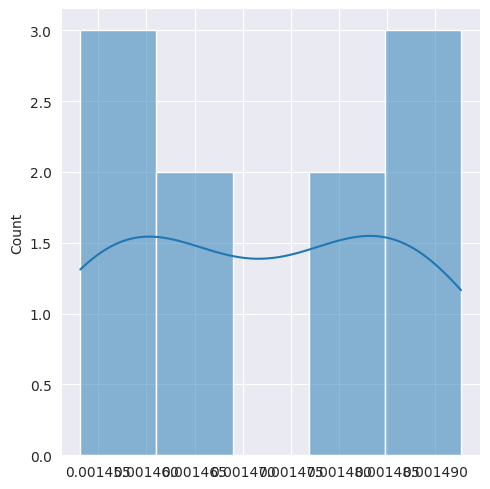

In [ ]:
plt.figure(figsize=(16,10))
sns.displot(-results, kde= True)

In [ ]:
np.exp(np.sqrt(np.mean(-results)))

1.0391127343802384

In [ ]:
pred = np.exp(np.exp(baseline.predict(x_test)))

In [ ]:
np.exp(y_test)

91563     8.978005
396300    8.988196
227261    8.847877
26820     8.759606
352831    9.080915
            ...   
75296     6.613384
461117    8.969923
40562     9.035201
46524     8.418036
232792    9.341632
Name: Purchase, Length: 258611, dtype: float64

In [ ]:
pred


array([ 7517.98422032,  7164.66726099,  5746.43490813, ...,
        8171.58401358, 12409.34781096, 13336.11573378])

In [ ]:
ense = {
    'lightgbm':LGBMRegressor(verbose = 0),
    'xgboost':XGBRegressor(),
    'gbr':GradientBoostingRegressor(),
    'ada':AdaBoostRegressor()
}

In [ ]:
for name, model in ense.items():
  model.fit(X_train, Y_train)
  print(name + ' trained.')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
lightgbm trained.
xgboost trained.
gbr trained.
ada trained.


In [ ]:
resu = {}
for name, model in ense.items():
  result = np.exp(np.sqrt(-cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv= kf)))
  resu[name] = result

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing

In [ ]:
for name, res in resu.items():
  print('___________________\n'+name)
  print(np.mean(res))
  print(np.std(res))

___________________
lightgbm
1.0391122917861373
0.00019156833792459746
___________________
xgboost
1.038737831677195
0.00020602573968690985
___________________
gbr
1.0399217271731755
0.00019155961254351534
___________________
ada
1.0557671691837904
0.0005967588625876903


In [ ]:
final_pred = (
    0.25 *np.exp(np.exp(ense['lightgbm'].predict(x_test)))+
    0.25 *np.exp(np.exp(ense['xgboost'].predict(x_test)))+
    0.25 *np.exp(np.exp(ense['gbr'].predict(x_test)))+
    0.25 *np.exp(np.exp(ense['ada'].predict(x_test)))
)

final_pred

array([ 7241.83274612,  7022.89339509,  5610.5660281 , ...,
        7681.48331833, 12044.83313889, 12798.5696243 ])

In [ ]:
np.exp(np.exp(ense['lightgbm'].predict(x_test)))

array([ 7517.98422032,  7164.66726099,  5746.43490813, ...,
        8171.58401358, 12409.34781096, 13336.11573378])